<a href="https://colab.research.google.com/github/Katbut/Homework/blob/main/MatStat_kurs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Курсовая работа. Выбрать тему курсового проекта."В проектной работе хотела бы сделать анализ потребления нефти и газа в мире (https://www.kaggle.com/datasets/zusmani/petrolgas-prices-worldwide) Рассчитать основные статистические показатели: Мода, медиана, квартили, дисперсию. Проверить, работает ли нормальное распределение и Паретто. Проверить есть ли зависимость между ежедневным потреблением и ценой на топливо.

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Petrol Dataset June 20 2022 (1).csv to Petrol Dataset June 20 2022 (1) (1).csv


In [15]:
import io
import pandas as pd
iodf1 = pd.read_csv((io.BytesIO(uploaded['Petrol Dataset June 20 2022 (1).csv'])) , encoding ='latin-1')

In [16]:
iodf1.columns.tolist()

['#',
 'Country',
 'Daily Oil Consumption (Barrels)',
 'World Share',
 'Yearly Gallons Per Capita',
 'Price Per Gallon (USD)',
 'Price Per Liter (USD)',
 'Price Per Liter (PKR)']

In [23]:
iodf1.head()

,#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
0,1,United States,19687287,20.30%,934.3,5.19,1.37,289.97
1,2,China,12791553,13.20%,138.7,5.42,1.43,302.87
2,3,India,4443000,4.60%,51.4,5.05,1.33,281.93
3,4,Japan,4012877,4.10%,481.5,4.69,1.24,262.05
4,5,Russia,3631287,3.70%,383.2,3.41,0.90,190.56


In [21]:
iodf1['Daily Oil Consumption (Barrels)'].value_counts()[0:5]

21000     6
40000     3
18000     3
23000     2
133000    2
Name: Daily Oil Consumption (Barrels), dtype: int64

In [22]:
iodf1['Daily Oil Consumption (Barrels)'].mode()

0    21000
dtype: int64

In [43]:
iodf1['Daily Oil Consumption (Barrels)'].mean()

533573.0497237568

In [46]:
iodf1['Daily Oil Consumption (Barrels)'].median()

61612.0

In [47]:
iodf1['Daily Oil Consumption (Barrels)'].quantile()

61612.0

In [53]:
iodf1['Daily Oil Consumption (Barrels)'].var(ddof=0)

3433339249559.6055

In [28]:
import scipy
from scipy import stats


stat, p = scipy.stats.shapiro(iodf1['Daily Oil Consumption (Barrels)']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.272, p-value=0.000
Отклонить гипотезу о нормальности


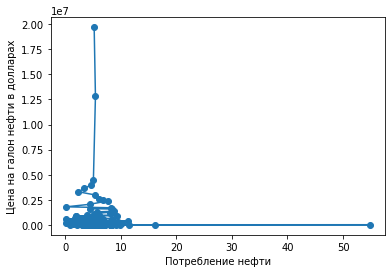

In [42]:
import matplotlib.pyplot as plt

plt.scatter(iodf1['Price Per Gallon (USD)'], iodf1['Daily Oil Consumption (Barrels)'])
plt.plot(iodf1['Price Per Gallon (USD)'], iodf1['Daily Oil Consumption (Barrels)'])
plt.xlabel('Потребление нефти')
plt.ylabel('Цена на галон нефти в долларах')

plt.show()

Видим, что зависимость между потреблением и ценой на нефть не линейна